## **Analysis On Electric Vehicle**

**Objective** To Uncover patterns and key insights

### importing libs

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [76]:
vehicle_data = pd.read_csv('dataset\Electric_Vehicle_Population_Data.csv')

In [77]:
vehicle_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


### Looking into the dataset

In [78]:
vehicle_data.shape

(159467, 17)

In [79]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159467 entries, 0 to 159466
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         159467 non-null  object 
 1   County                                             159463 non-null  object 
 2   City                                               159463 non-null  object 
 3   State                                              159467 non-null  object 
 4   Postal Code                                        159463 non-null  float64
 5   Model Year                                         159467 non-null  int64  
 6   Make                                               159467 non-null  object 
 7   Model                                              159467 non-null  object 
 8   Electric Vehicle Type                              159467 non-null  object

Electric Range -> distance traveled                                
Base MSRP  -> initial price

A county is an area within a state. A town, city, borough or city is an area within a county.

A Battery Electric Vehicle (BEV) is an all-electric vehicle using one or more batteries to store the electrical energy that powers the motor and is charged by plugging the vehicle into an electric power source.

A Plug-in Hybrid Electric Vehicle (PHEV) is a vehicle that uses one or more batteries to power an electric motor; uses another fuel, such as gasoline or diesel, to power an internal combustion engine or other propulsion sources; and is charged by plugging the vehicle into an electric power source.

Clean Alternative Fuel Vehicle (CAFV) Eligibility is based on the fuel requirement and electric-only range requirement as outlined in RCW 82.08.809 and RCW 82.12.809 to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions. Sales or leases of these vehicles must occur on or after 8/1/2019 and meet the purchase price requirements to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions.


Monthly count of vehicles for a county may change from this report and prior reports. Processes were implemented to more accurately assign county at the time of registration.


Electric Range is no longer maintained for Battery Electric Vehicles (BEV) because new BEVs have an electric range of 30 miles or more. Zero (0) will be entered where the electric range has not been researched.

Field 'Electric Utility' was added starting with the publication in March 2022.


Field '2020 Census Tract' was added starting with the publication in June 2022.


## Questions/Objectives

1. Which is the make with the most electric vehicles?
2. Which is the model with the most electric vehicles?
3. When was most electric creates
4. Which county has the most electric vehicles?
5. How many vehicles are there per type?
6. Which city has the most electric vehicles?
7. Perform a correlation/descriptive statistics for electric range and MSRP

### Performing Data Cleaning

In [80]:
missing_data_percentage = (vehicle_data.isnull().sum() / len(vehicle_data)) * 100
missing_data_percentage

VIN (1-10)                                           0.000000
County                                               0.002508
City                                                 0.002508
State                                                0.000000
Postal Code                                          0.002508
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.226379
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.005644
Electric Utility                                     0.002508
2020 Cen

**Insight:** We will be dropping the null values since it is less than 1% of the dataset

In [81]:
vehicle_data.dropna(inplace=True)

In [82]:
vehicle_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

Perform Univariate EDA

*Taking the columns one after another for more depth analysis*

In [83]:
vehicle_data['County'].nunique()

39

In [84]:
vehicle_data['County'].unique()

array(['Kitsap', 'Stevens', 'Yakima', 'Thurston', 'Island', 'Snohomish',
       'Chelan', 'Whitman', 'King', 'Skagit', 'Spokane', 'Grant',
       'Walla Walla', 'Clark', 'Cowlitz', 'Jefferson', 'Klickitat',
       'Clallam', 'Pierce', 'Lewis', 'Grays Harbor', 'Kittitas',
       'Douglas', 'San Juan', 'Whatcom', 'Pacific', 'Benton', 'Okanogan',
       'Skamania', 'Franklin', 'Mason', 'Lincoln', 'Adams', 'Ferry',
       'Asotin', 'Pend Oreille', 'Wahkiakum', 'Columbia', 'Garfield'],
      dtype=object)

In [85]:
vehicle_data['City'].nunique()

464

In [86]:
vehicle_data['City'].unique()

array(['Bremerton', 'Colville', 'Yakima', 'Bainbridge Island', 'Tumwater',
       'Port Orchard', 'Olalla', 'Poulsbo', 'Rainier', 'Olympia',
       'Clinton', 'Bothell', 'Langley', 'Manson', 'Pullman', 'Seattle',
       'Lynnwood', 'Anacortes', 'Monroe', 'Leavenworth', 'Mukilteo',
       'Arlington', 'Everett', 'Redmond', 'Bow', 'Lake Stevens',
       'Mountlake Terrace', 'Silverdale', 'Wenatchee', 'Spokane',
       'Moses Lake', 'Edmonds', 'Brier', 'Marysville', 'Snohomish',
       'College Place', 'Yelm', 'Coupeville', 'Oak Harbor', 'Loon Lake',
       'Waitsburg', 'Vancouver', 'Kirkland', 'Normandy Park',
       'Battle Ground', 'Kent', 'Issaquah', 'Bellevue', 'Tukwila',
       'Shoreline', 'Lake Forest Park', 'Camas', 'Renton', 'Silverlake',
       'Kingston', 'Sammamish', 'Washougal', 'Duvall', 'Covington',
       'Seatac', 'Medina', 'Woodinville', 'Auburn', 'Burien',
       'Federal Way', 'Newcastle', 'Sequim', 'Longview', 'Kenmore',
       'Kelso', 'Enumclaw', 'Port Ludlow', 'Ro

In [87]:
vehicle_data['State'].nunique()

1

In [88]:
vehicle_data['State'].unique()

array(['WA'], dtype=object)

**We are not using the Postal Code for our analysis, we will be dropping it and move over to Model Year**

In [89]:
vehicle_data = vehicle_data.drop(columns=["Postal Code"])

Plotting the distribution 

**Q1. Which is the make with the most electric vehicles?**

In [90]:
vehicle_data['Make'].unique()

array(['CHRYSLER', 'KIA', 'TESLA', 'NISSAN', 'MINI', 'TOYOTA', 'FORD',
       'VOLVO', 'CHEVROLET', 'FIAT', 'AUDI', 'BMW', 'JEEP', 'POLESTAR',
       'HONDA', 'VOLKSWAGEN', 'LINCOLN', 'MERCEDES-BENZ', 'RIVIAN',
       'PORSCHE', 'HYUNDAI', 'SUBARU', 'SMART', 'JAGUAR', 'MITSUBISHI',
       'CADILLAC', 'LEXUS', 'ALFA ROMEO', 'MAZDA', 'GENESIS', 'LUCID',
       'LAND ROVER', 'DODGE', 'TH!NK', 'WHEEGO ELECTRIC CARS', 'FISKER',
       'BENTLEY', 'AZURE DYNAMICS'], dtype=object)

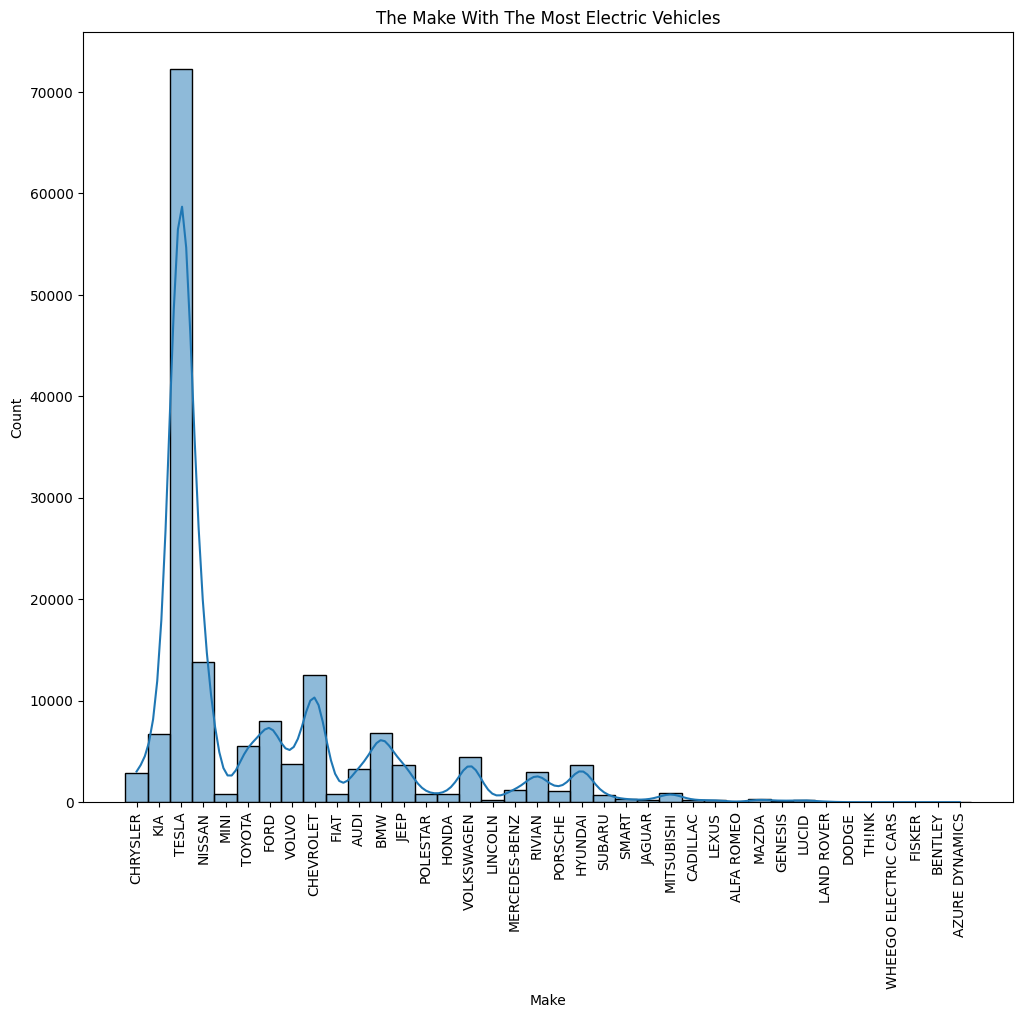

In [91]:
plt.figure(figsize=(12, 10))
# Histogram
sns.histplot(vehicle_data['Make'], kde=True)
plt.title('The Make With The Most Electric Vehicles')
plt.xticks(rotation=90)
plt.show()

**Insight** From the above graph the Make with the highest electric vehicle is **Tesla**

**Q2. Which is the model with the most electric vehicles?**

In [92]:
vehicle_data['Model'].nunique()

130

In [93]:
vehicle_data["Model"].unique()

array(['PACIFICA', 'EV6', 'MODEL 3', 'LEAF', 'NIRO', 'COUNTRYMAN',
       'MODEL Y', 'PRIUS PLUG-IN', 'C-MAX', 'MODEL S', 'XC90', 'MODEL X',
       'VOLT', '500', 'BOLT EV', 'E-TRON', 'PRIUS PRIME', 'A3', '530E',
       'X5', 'WRANGLER', 'HARDTOP', 'PS2', 'I3', 'Q5 E', 'CLARITY',
       'SOUL', 'E-GOLF', 'SPARK', 'AVIATOR', 'RAV4 PRIME', 'GLC-CLASS',
       'R1T', 'ID.4', 'TAYCAN', 'KONA ELECTRIC', 'FOCUS', 'Q5', 'KONA',
       'R1S', 'BOLT EUV', 'F-150', 'XC40', 'SOLTERRA', 'FUSION',
       'FORTWO ELECTRIC DRIVE', 'EQB-CLASS', 'TUCSON', 'IX',
       'EQE-CLASS SEDAN', 'I-PACE', 'I4', 'XC60', 'EQE-CLASS SUV',
       'MUSTANG MACH-E', 'C40', '330E', 'OUTLANDER', 'S60', 'SANTA FE',
       'GRAND CHEROKEE', 'Q4', 'IONIQ 5', 'LYRIQ', 'RZ 450E', 'ARIYA',
       'ELR', 'X3', 'TONALE', 'EQS-CLASS SUV', 'EQ FORTWO', 'PRIUS',
       'B-CLASS', 'BZ4X', 'SPORTAGE', 'CX-90', 'I-MIEV', 'G80', 'ESCAPE',
       'SOUL EV', 'Q8', 'IONIQ 6', 'TRANSIT', 'ROADSTER', 'RS E-TRON GT',
       'CAYENNE', 'PAN

In [94]:
vehicle_data['Model'].mode()

0    MODEL Y
Name: Model, dtype: object

In [95]:
model_data = vehicle_data['Model'].value_counts()
model_data_top_20 = model_data.head(20).reset_index()
model_data_top_20

,Model,count
0,MODEL Y,30790
1,MODEL 3,28505
2,LEAF,13296
3,MODEL S,7626
4,BOLT EV,6104
5,MODEL X,5306
6,VOLT,4862
7,ID.4,3345
8,NIRO,3029
9,MUSTANG MACH-E,2933


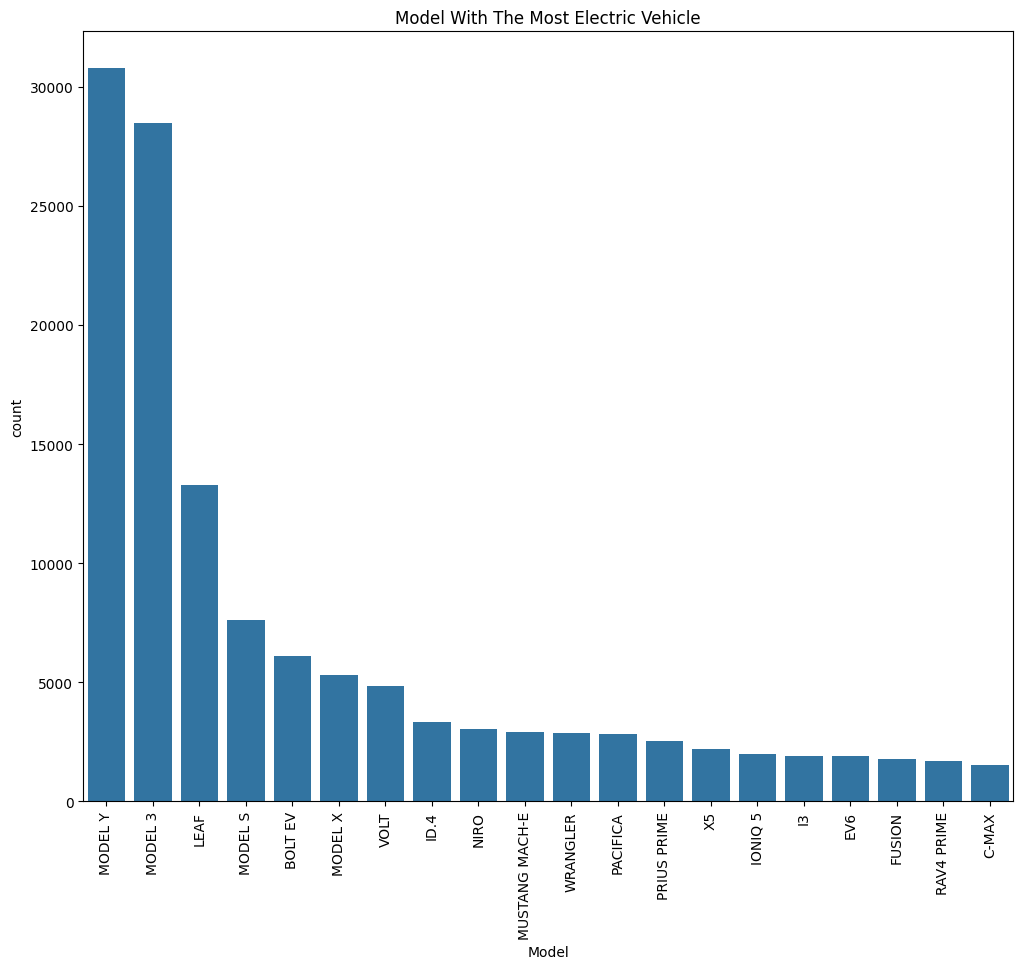

In [96]:
plt.figure(figsize=(12, 10))
# Histogram
sns.barplot(x = model_data_top_20['Model'], y = model_data_top_20['count'])
plt.title('Model With The Most Electric Vehicle')
plt.xticks(rotation=90)
plt.show()

**Insight** From the graph above we can see that the **Model Y** with 30790 and **Model 3** with 28505.

**Q3. When was most electric creates**

In [97]:
vehicle_data['Model Year'].nunique()

22

In [98]:
vehicle_data['Model Year'].unique()

array([2017, 2020, 2022, 2018, 2019, 2012, 2021, 2016, 2013, 2014, 2015,
       2023, 2011, 2024, 2010, 2008, 2000, 2002, 1998, 1997, 1999, 2003],
      dtype=int64)

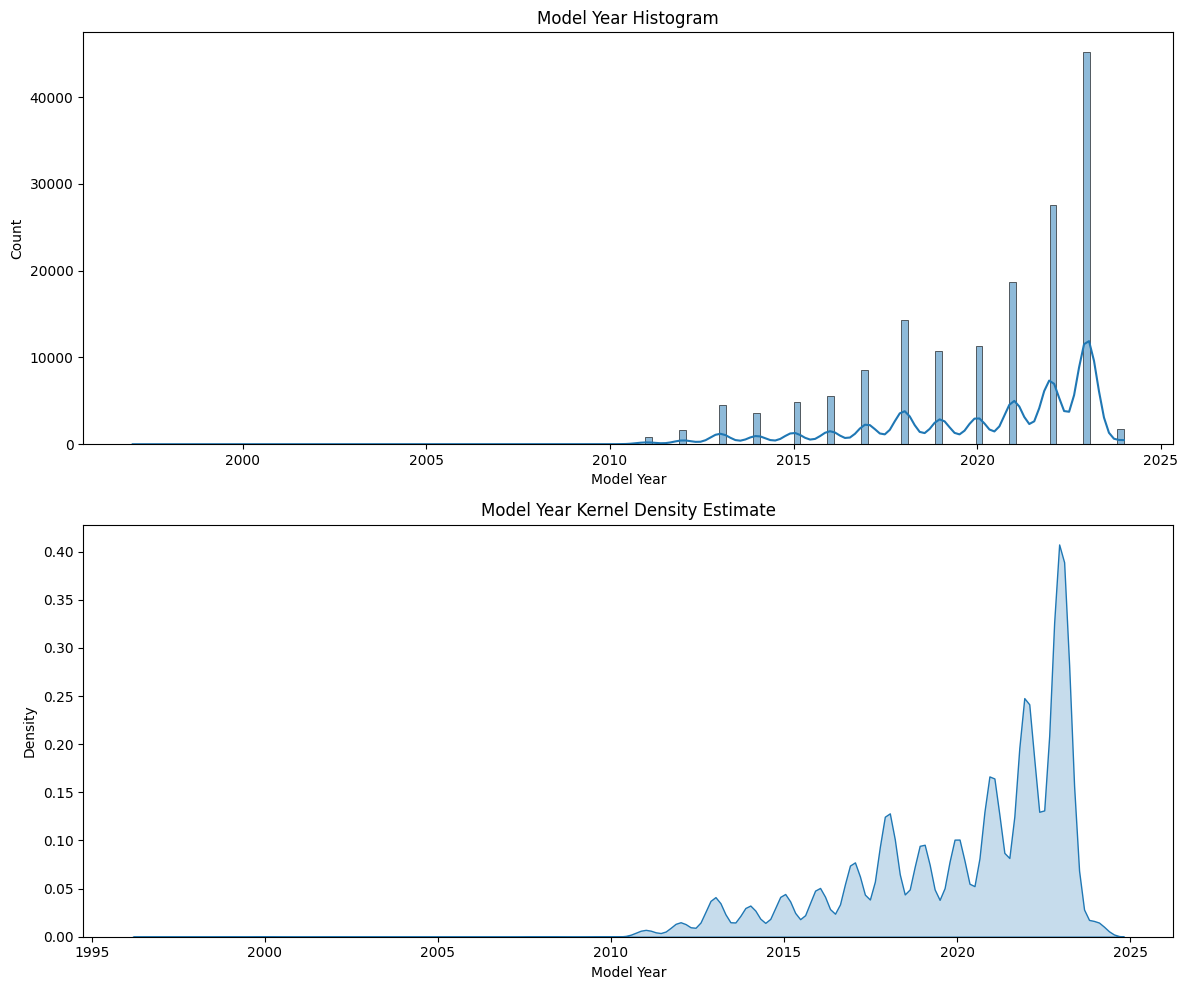

In [99]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Histogram
sns.histplot(vehicle_data['Model Year'], kde=True, ax=axs[0])
axs[0].set_title('Model Year Histogram')

# KDE
sns.kdeplot(vehicle_data['Model Year'], fill=True, ax=axs[1])
axs[1].set_title('Model Year Kernel Density Estimate')

plt.tight_layout()
plt.show()

In [100]:
model_year_data = vehicle_data['Model Year'].value_counts()
model_year_data_top_10 = model_year_data.head(10).reset_index()
model_year_data_top_10

,Model Year,count
0,2023,45205
1,2022,27609
2,2021,18662
3,2018,14294
4,2020,11366
5,2019,10707
6,2017,8549
7,2016,5586
8,2015,4880
9,2013,4504


**Insight** Most Electric vehicle were made between 2020 - 2023

**Q4. Which county has the most electric vehicles?**

In [103]:
county_data = vehicle_data['County'].value_counts().reset_index()
county_data

,County,count
0,King,83413
1,Snohomish,18544
2,Pierce,12315
3,Clark,9364
4,Thurston,5711
5,Kitsap,5216
6,Spokane,4016
7,Whatcom,3865
8,Benton,1941
9,Skagit,1759


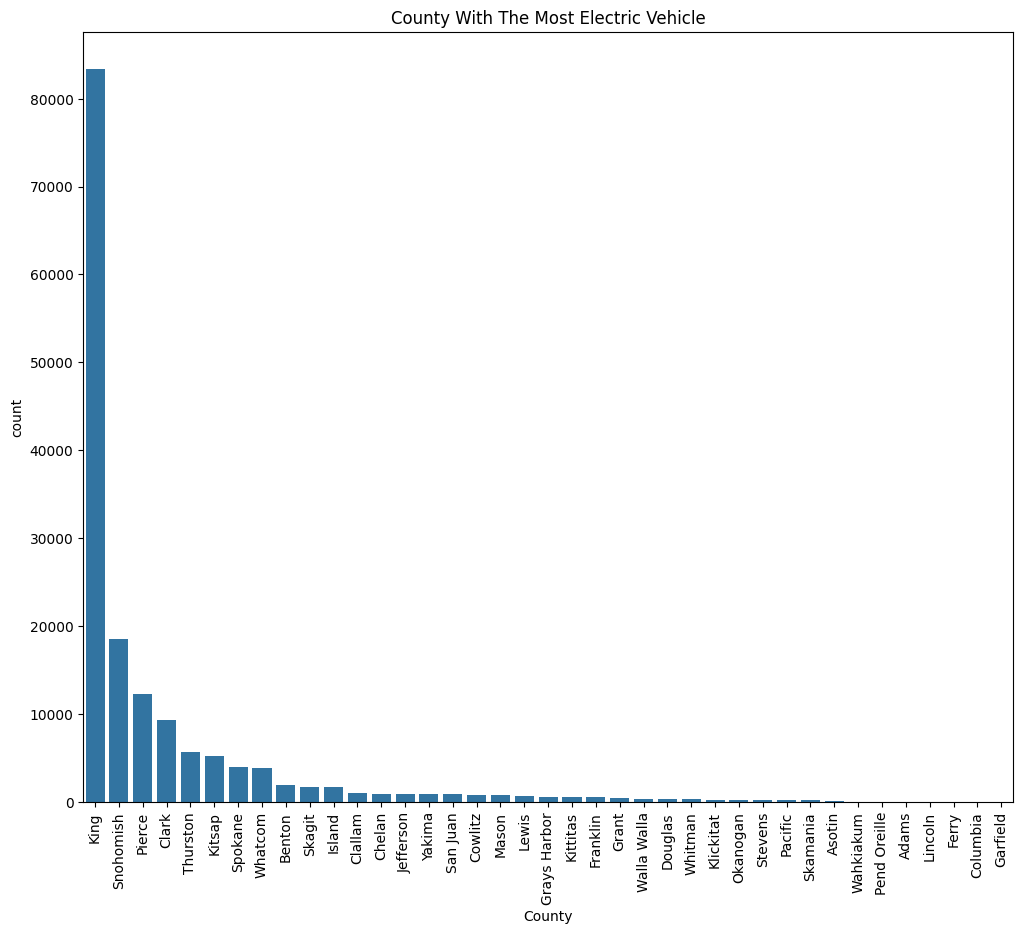

In [104]:
plt.figure(figsize=(12, 10))
# Histogram
sns.barplot(x = county_data['County'], y = county_data['count'])
plt.title('County With The Most Electric Vehicle')
plt.xticks(rotation=90)
plt.show()

**Insight** From the chart above we can see that the **King** county has the most electric vehicle

**Q5. How many vehicles are there per type?**

In [107]:
electric_vehicle_type_data = vehicle_data['Electric Vehicle Type'].value_counts().reset_index()
electric_vehicle_type_data

,Electric Vehicle Type,count
0,Battery Electric Vehicle (BEV),123913
1,Plug-in Hybrid Electric Vehicle (PHEV),35188


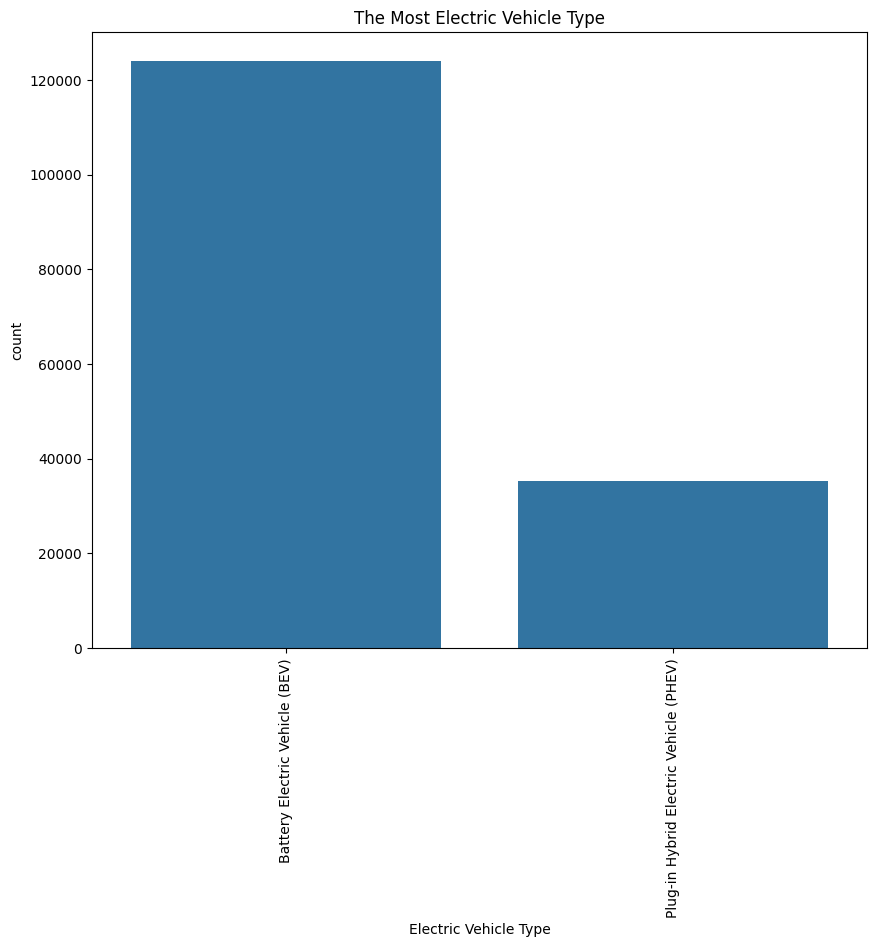

In [110]:
plt.figure(figsize=(10, 8))
# Histogram
sns.barplot(x = electric_vehicle_type_data['Electric Vehicle Type'], y = electric_vehicle_type_data['count'])
plt.title('The Most Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

**Insight**  Of the vehicle types (BEV,PHEV) most are battery electric vehicles showing a significant transition compared to PHEVs

**Q6. Which city has the most electric vehicles?**

In [113]:
city_vehicle_data = vehicle_data['City'].value_counts().reset_index()
city_vehicle_data = city_vehicle_data.head(7)
city_vehicle_data

,City,count
0,Seattle,26932
1,Bellevue,8075
2,Redmond,5796
3,Vancouver,5599
4,Bothell,5176
5,Kirkland,4859
6,Sammamish,4657


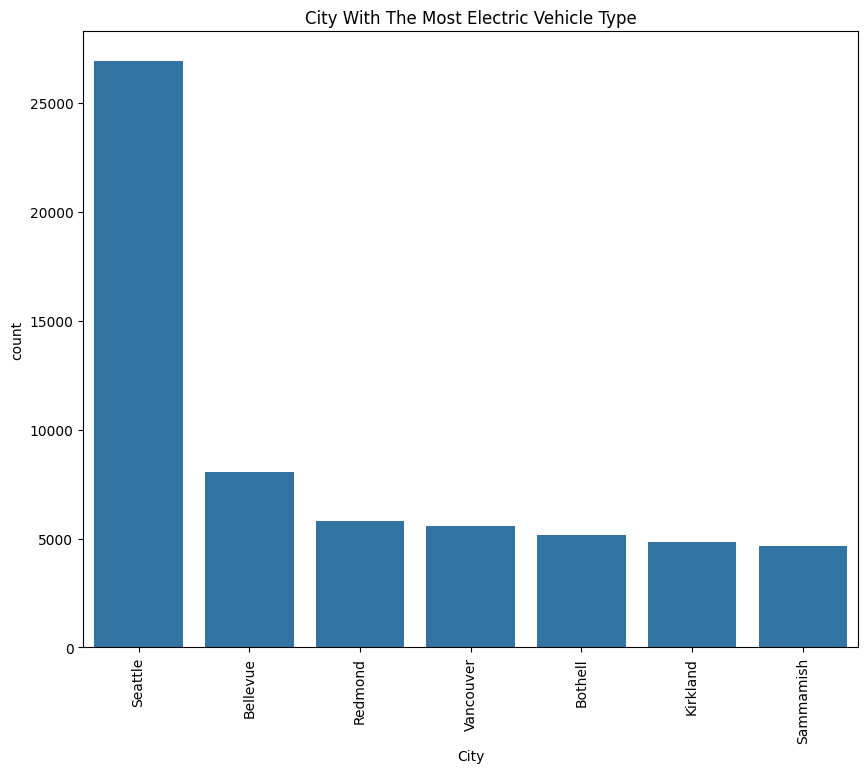

In [114]:
plt.figure(figsize=(10, 8))
# Histogram
sns.barplot(x = city_vehicle_data['City'], y = city_vehicle_data['count'])
plt.title('City With The Most Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

**Insight** The city of seattle shows a large number of electric vehicles, this may be due to many factors.

**Q7. Perform a correlation/descriptive statistics for electric range and MSRP**

In [115]:
vehicle_data[['Electric Range', 'Base MSRP']].describe()

,Electric Range,Base MSRP
count,159101.000000,159101.000000
mean,64.271211,1224.902892
std,94.630664,8918.602487
min,0.000000,0.000000
25%,0.000000,0.000000
50%,14.000000,0.000000
75%,84.000000,0.000000
max,337.000000,845000.000000


**Eligibility Analysis**

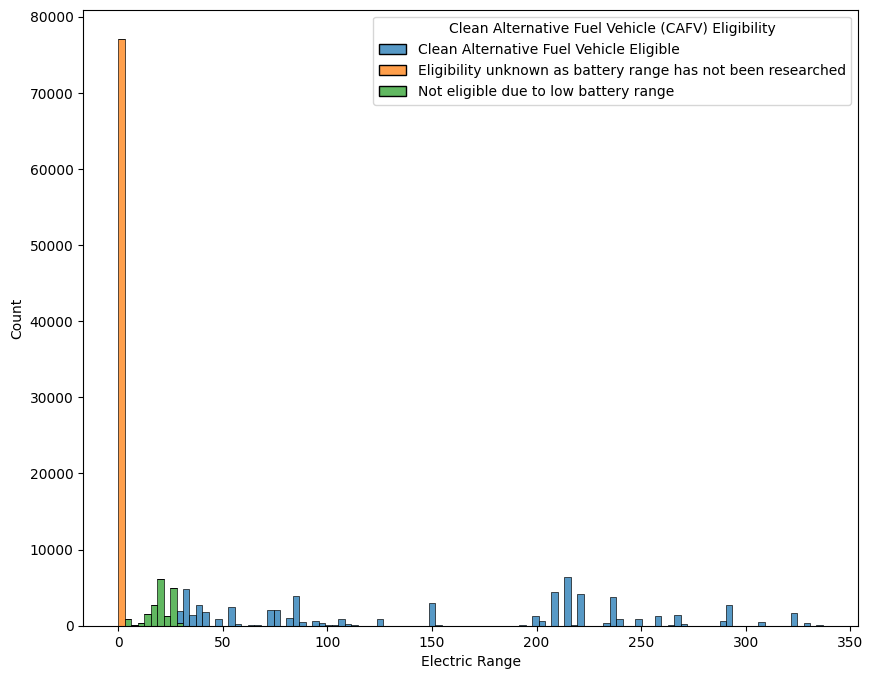

In [117]:
plt.figure(figsize=(10, 8))
sns.histplot(data=vehicle_data, x="Electric Range", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", multiple="stack")
plt.show()

**Insight** Electric vehicles with ranges exceeding 50 miles are confirmed to be eligible for clean fuel incentives. However, for vehicles with ranges below 50 miles, eligibility is uncertain or not clearly defined.